## **Problem Statement**

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider **BoomBikes** has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


## **Business Goal:**
We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from pandas.plotting import lag_plot

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

## **Reading and Understanding the Data**

In [2]:
#Read the Boom Bike Dataset
df_bikes =pd.read_csv('day.csv',low_memory=False)
df_bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
#Find the number of rows and columns
df_bikes.shape

(730, 16)

In [4]:
# Check the data type descriptive information
df_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
#summary of numerical columns in the bike dataset
df_bikes.describe()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## **Data Quality Checks**

#### **Checking for Row/Column wise null values**

### Unique Column Removal

In [6]:
unique_columns = []
for col in df_bikes.columns:
    if df_bikes[col].nunique() == len(df_bikes):
        unique_columns.append(col)
print(unique_columns)
df_bikes.drop(unique_columns, axis =1 ,inplace=True)

['instant', 'dteday']


#### No Single Value Column Removal

In [7]:
# Identify and drop  columns with only one value
single_category_columns = []
for col in df_bikes.columns:
    if df_bikes[col].nunique() == 1 :
        single_category_columns.append(col)
print(single_category_columns)

[]


In [8]:
# Calculate null percentage for each column
null_percentage = (df_bikes.isnull().sum() / len(df_bikes)) * 100

# Get columns with null percentage greater than 70%
columns_to_drop_null = null_percentage[null_percentage > 70].index

# Drop columns from DataFrame
#df = df.drop(columns=columns_to_drop_null)

# Calculate null percentage for each column
null_percentage = (df_bikes.isna().sum() / len(df_bikes)) * 100

# Get columns with null percentage greater than 50%
columns_to_drop = null_percentage[null_percentage > 50].index

# Drop columns from DataFrame
#df = df.drop(columns=columns_to_drop)
print(columns_to_drop_null)
print(columns_to_drop)

Index([], dtype='object')
Index([], dtype='object')


In [9]:
df_bikes.nunique().sort_values()

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          498
hum           594
casual        605
windspeed     649
registered    678
atemp         689
cnt           695
dtype: int64

In [10]:
df_bikes.shape


(730, 14)

In [11]:
#Dropping Columns Since these values add up to total count thus highly correlated
df_bikes.drop(['casual','registered'],axis=1,inplace=True)

In [12]:
df_bikes.shape

(730, 12)

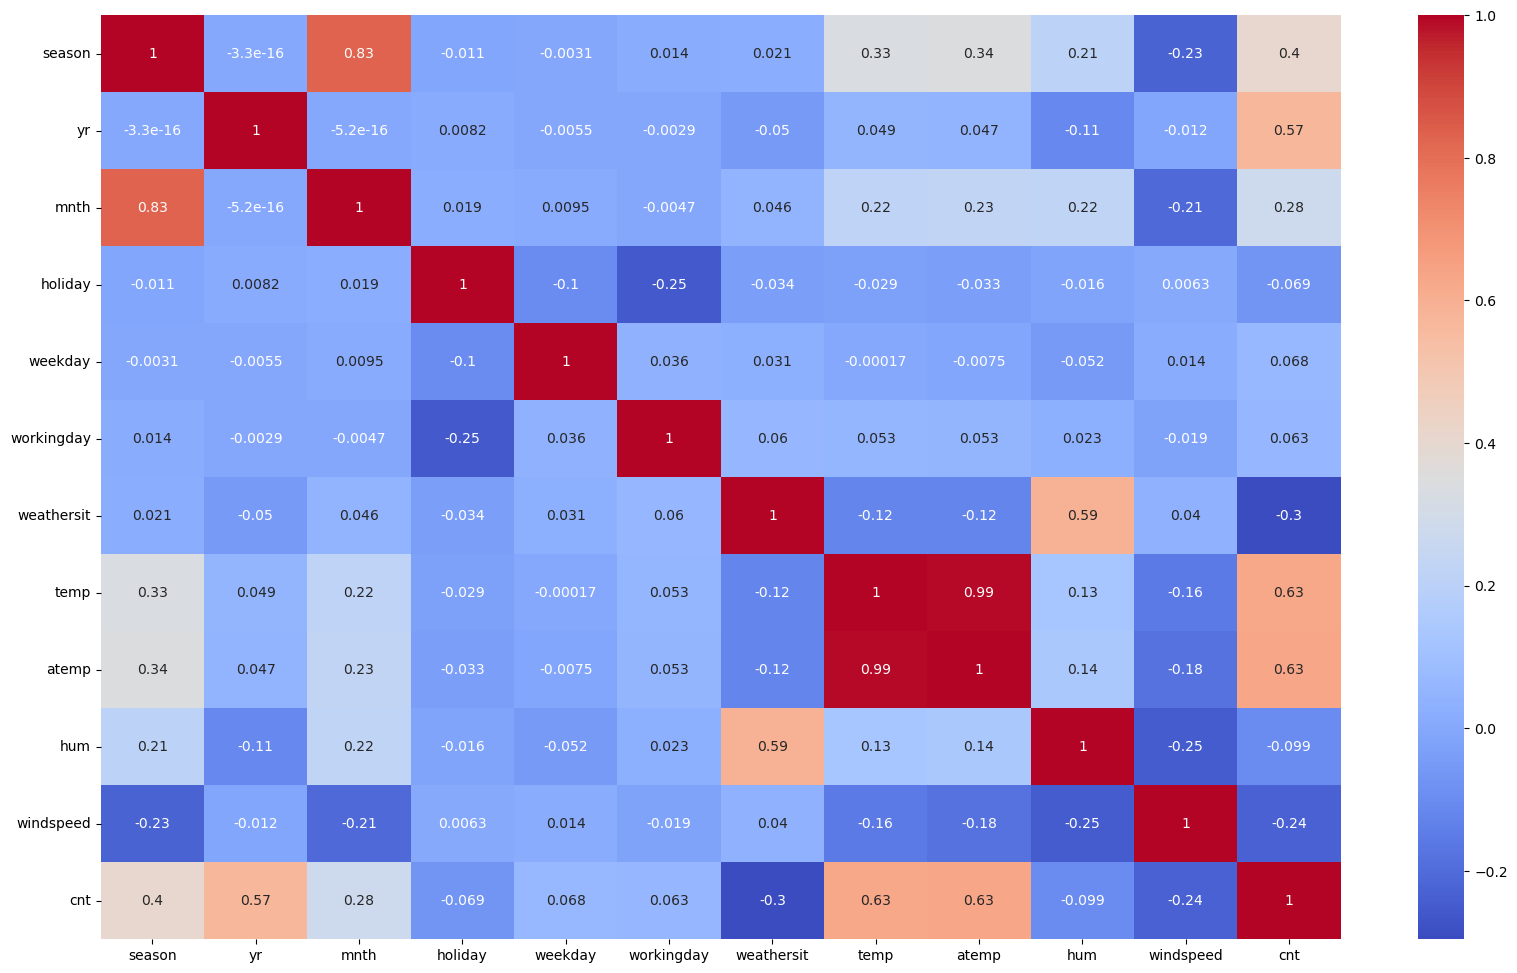

In [13]:
plt.figure(figsize=(20,12))
sns.heatmap(df_bikes.corr(),annot=True,cmap='coolwarm')
plt.show()

In [14]:
# atemp and temp are highly correlated so we can remove atemp 
df_bikes.drop(['atemp'],axis=1,inplace=True)

#### **Identifying the catagorical and continuous variables**

In [15]:
numerical_columns = df_bikes.select_dtypes(include=[ 'float']).columns
categorical_columns = df_bikes.select_dtypes(include=['int']).columns[0:7]

print(numerical_columns)
print(categorical_columns)

Index(['temp', 'hum', 'windspeed'], dtype='object')
Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit'],
      dtype='object')


In [16]:
def plot_histograms_min_max(df, columns):
    # Iterate over each specified column
    for column in columns:
        min_val = df[column].min()
        max_val = df[column].max()
        
        plt.figure(figsize=(8, 6))
        sns.histplot(df[column], kde=True, stat='density')
        plt.title(f'Histogram for {column} (Min: {min_val}, Max: {max_val})')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.xlim(min_val, max_val)  # Limit x-axis to min and max values
        plt.show()

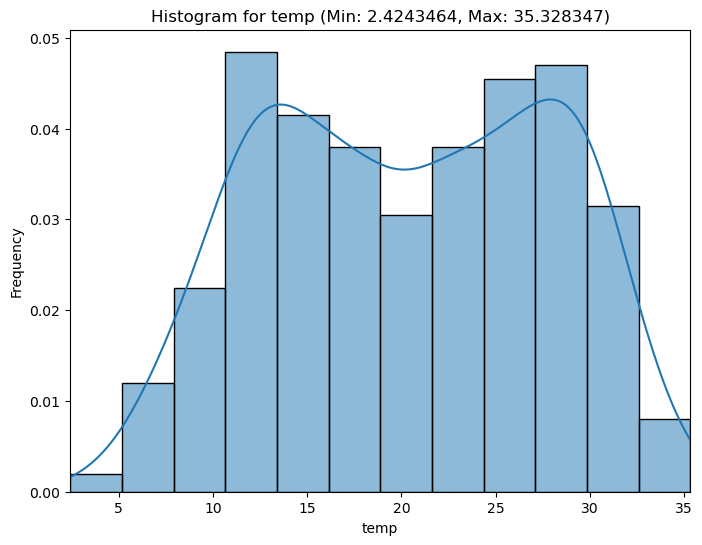

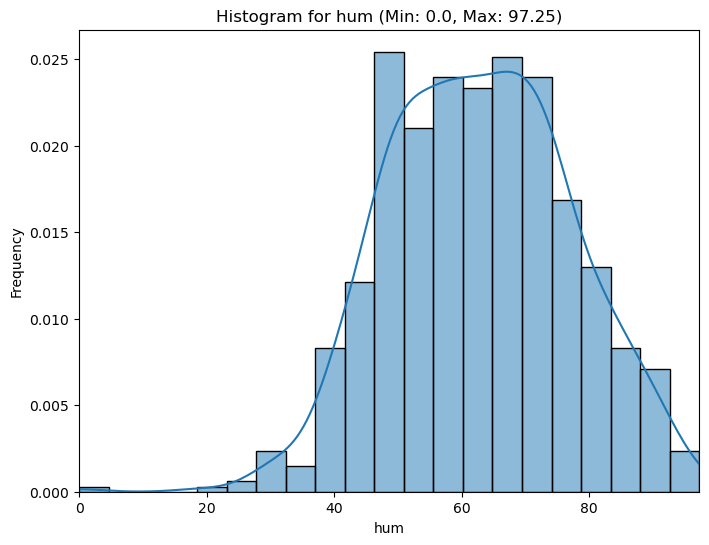

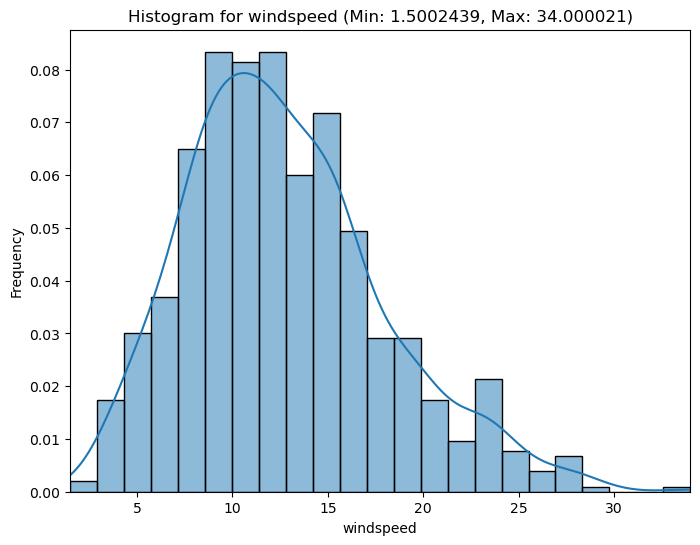

In [17]:
plot_histograms_min_max(df_bikes, numerical_columns)

In [18]:
def remove_outliers(column):
    mean_val = column.mean()
    std_dev = column.std()
    lower_threshold = mean_val - 3 * std_dev  # Lower bound (handle lower outliers)
    upper_threshold = mean_val + 3 * std_dev  # Upper bound (handle upper outliers)
    
    # Return a boolean mask where True indicates the data points that are NOT outliers
    return (column >= lower_threshold) & (column <= upper_threshold)

outlier_columns = numerical_columns
for col in outlier_columns:
    outlier_mask = remove_outliers(df_bikes[col])  # Get a boolean mask for outliers
    df_bikes = df_bikes[outlier_mask]  # Filter rows based on the boolean mask

# Reset index of the modified DataFrame
df_bikes.reset_index(drop=True, inplace=True)

print(df_bikes.shape)

(725, 11)


In [19]:
#plot_histograms_min_max(df_bikes, numerical_columns)


In [20]:
# outliers in temp
df_bikes = df_bikes.drop(index = df_bikes[(df_bikes['temp'] > 15) & (df_bikes['temp'] < 20) & (df_bikes['cnt'] < 100)].index)
df_bikes = df_bikes.drop(index = df_bikes[(df_bikes['temp'] > 25) & (df_bikes['temp'] < 30) & (df_bikes['cnt'] < 2000)].index)
df_bikes = df_bikes.drop(index = df_bikes[(df_bikes['temp'] > 35)  & (df_bikes['cnt'] > 2000) & (df_bikes['cnt'] < 4000)].index)

In [21]:
def plot_boxplots(df, columns):
    # Iterate over each specified column
    palette = sns.color_palette("husl", len(columns))
    for i,column in enumerate(columns):
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df[column],color=palette[i])
        plt.title(f'Box Plot for {column}')
        plt.xlabel(column)
        plt.show()

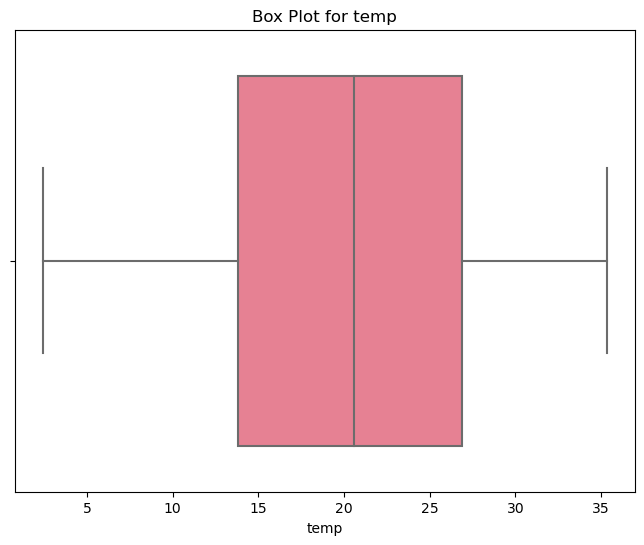

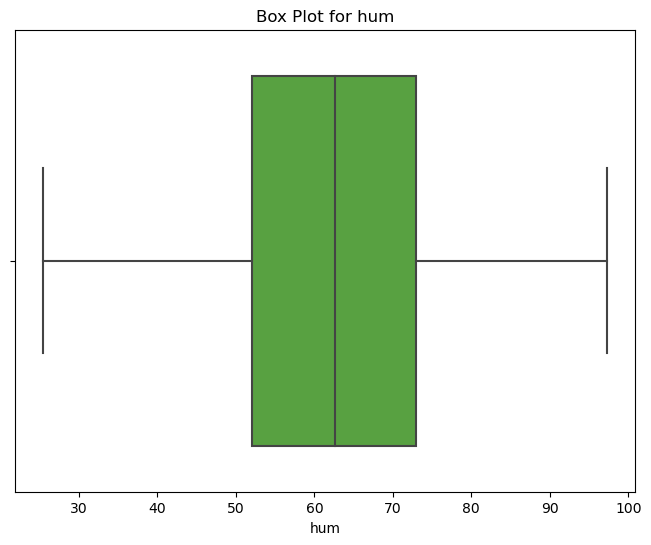

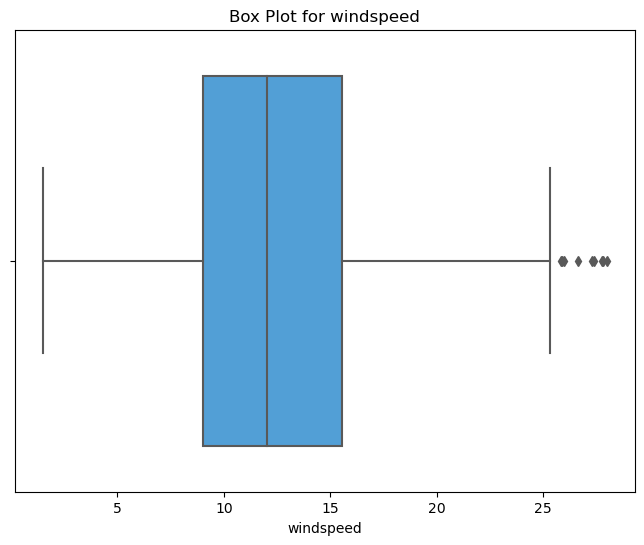

In [22]:
plot_boxplots(df_bikes, numerical_columns)

In [23]:
df_bikes.shape

(722, 11)

In [24]:
df_bikes= df_bikes[df_bikes['windspeed']<=25]

In [25]:
df_bikes.shape

(710, 11)

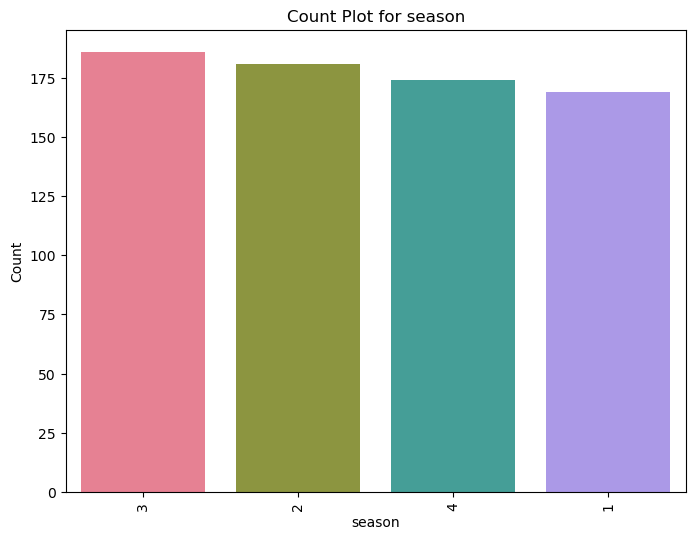

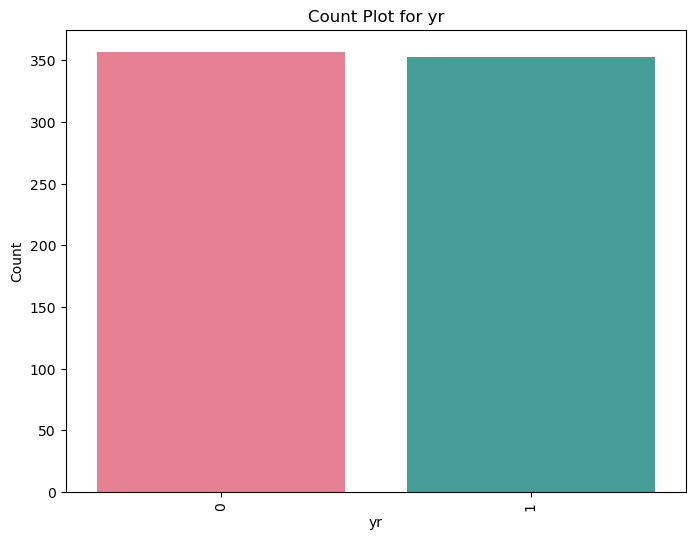

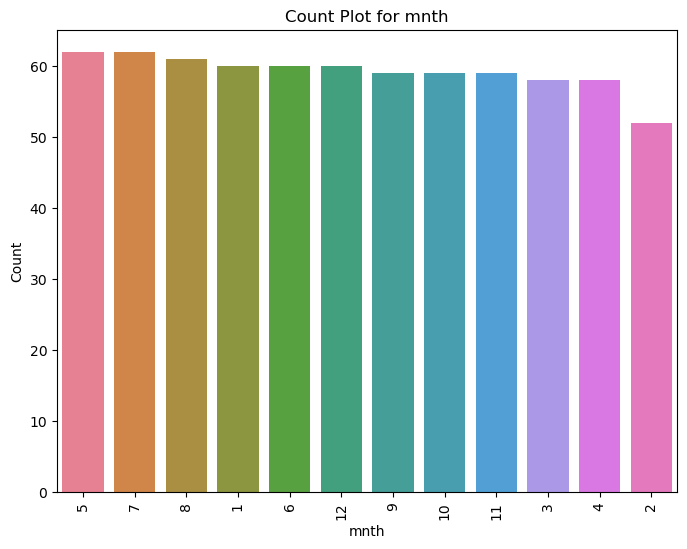

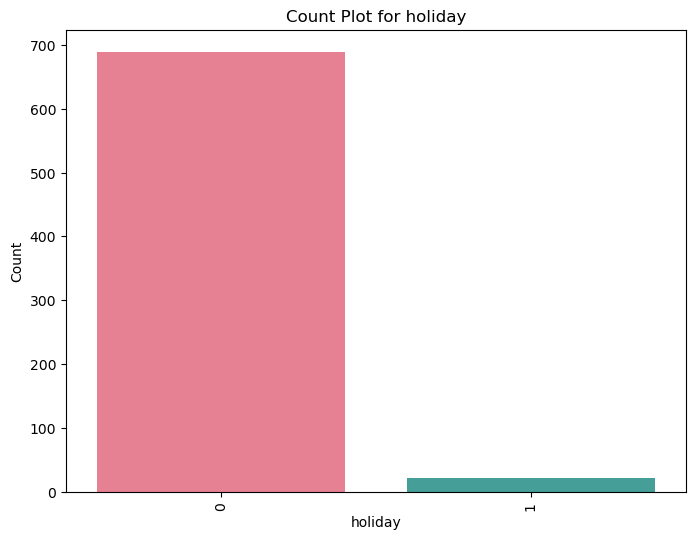

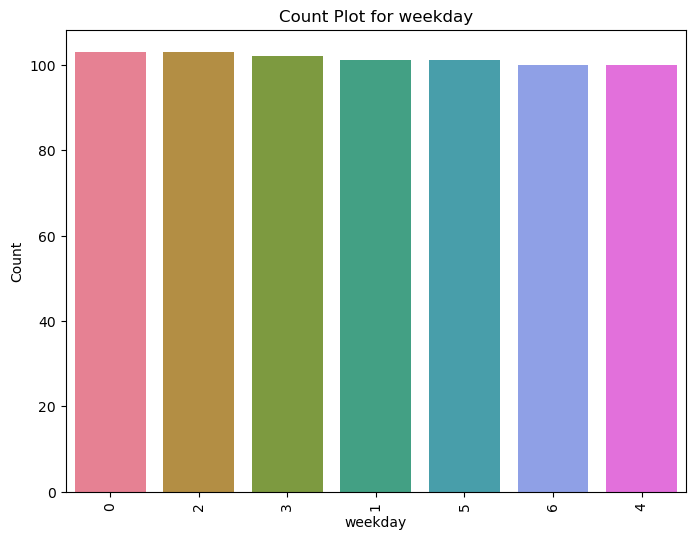

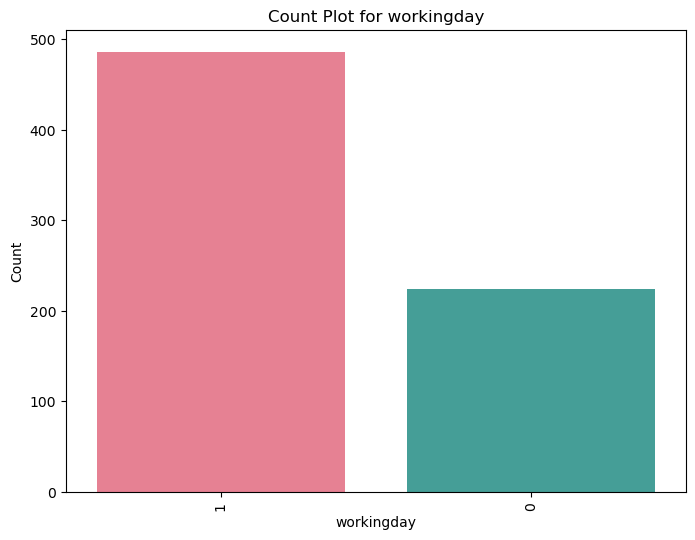

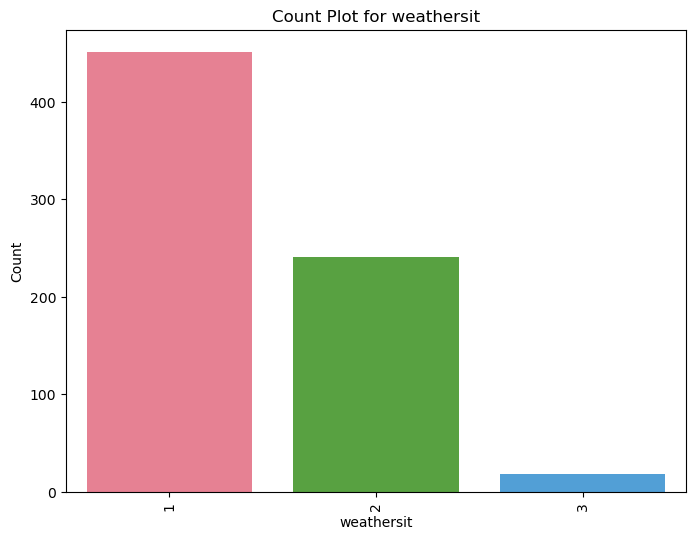

In [26]:
def plot_countplot(df, columns):
    for column in columns:
        plt.figure(figsize=(8, 6))
        sns.countplot(x=column, data=df, palette='husl',order=df[column].value_counts().index)
        plt.title(f'Count Plot for {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=90) 
        plt.show()
plot_countplot(df_bikes, categorical_columns)

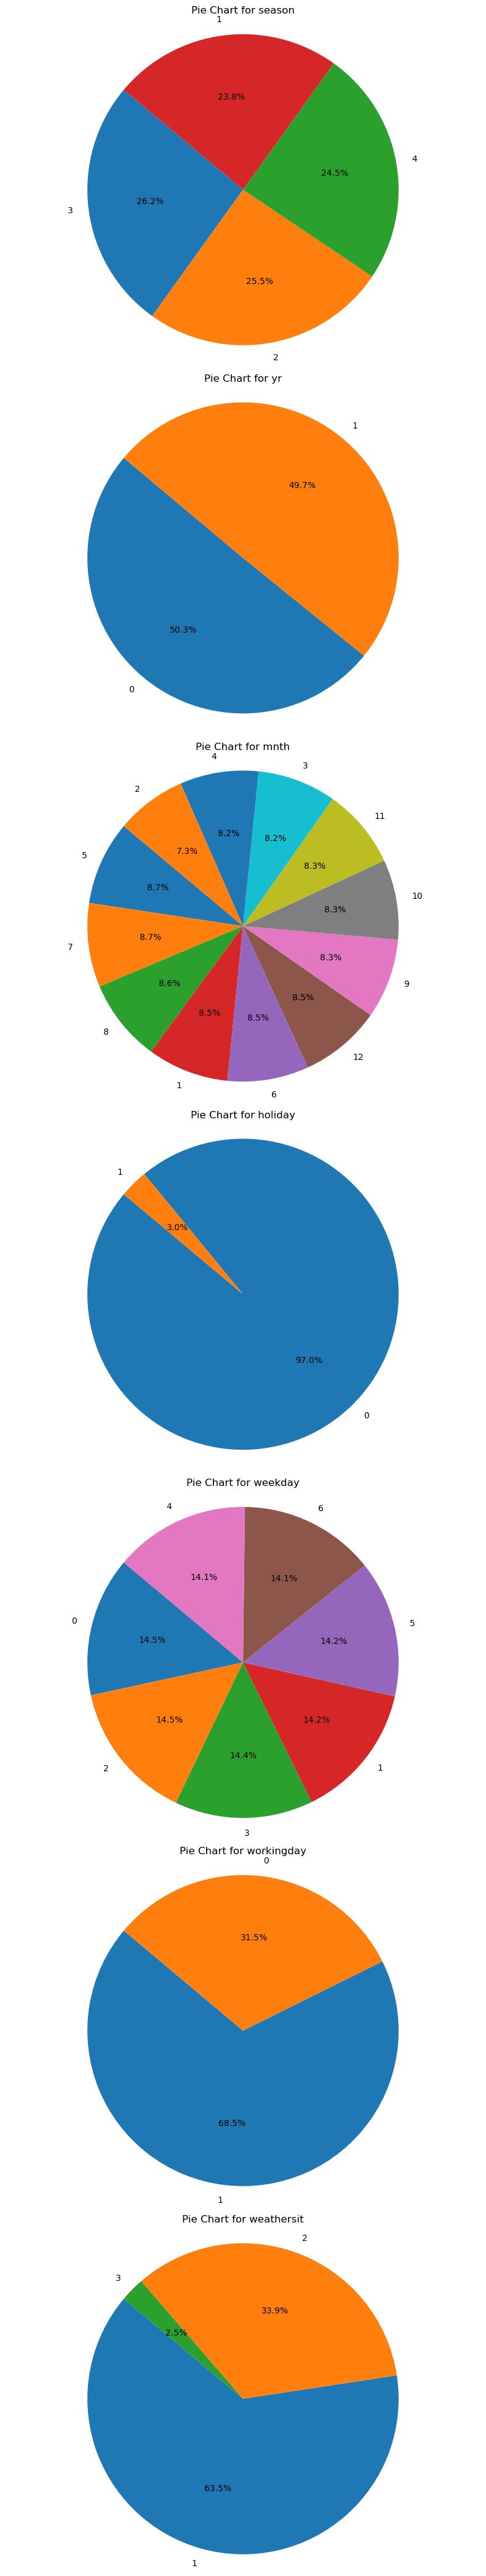

In [27]:
def plot_pie_charts(df, columns):
    num_cols = len(columns)
    fig, axes = plt.subplots(nrows=num_cols, ncols=1, figsize=(8, num_cols*6))
    
    if num_cols == 1:
        axes = [axes]  # Ensure that axes is always a list

    for i, column in enumerate(columns):
        category_counts = df[column].value_counts()

        # Plot pie chart
        axes[i].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
        axes[i].set_title(f'Pie Chart for {column}')
        axes[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.tight_layout()
    plt.show()

plot_pie_charts(df_bikes, categorical_columns)

<Figure size 2400x1600 with 0 Axes>

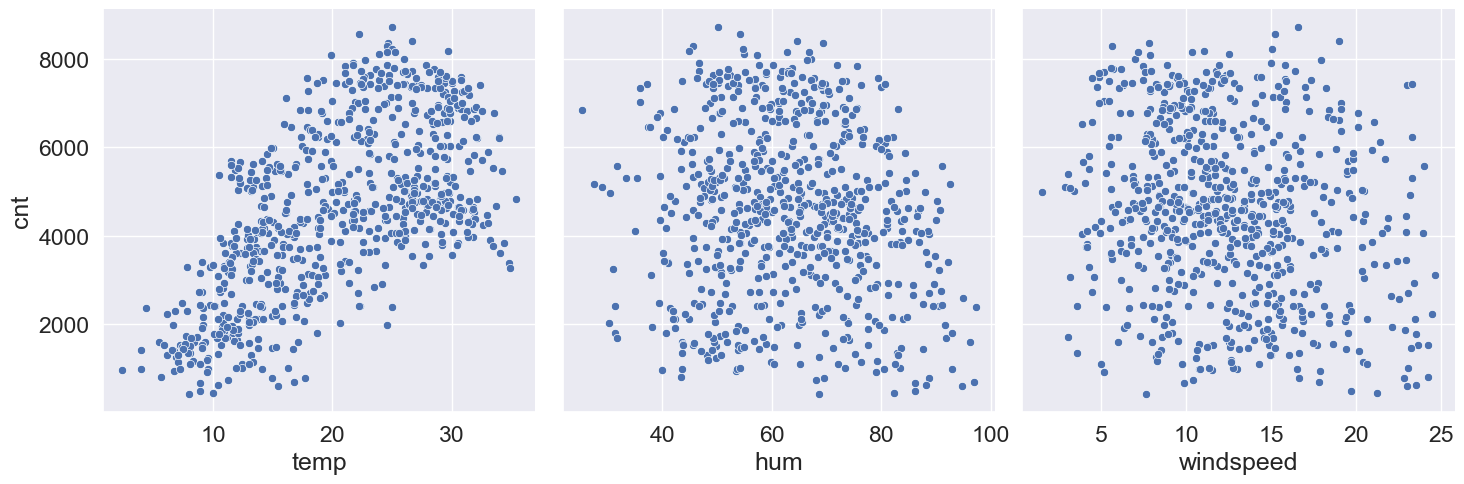

In [28]:
plt.figure(figsize=(24, 16))

# Set the font scale to increase the font size
sns.set(font_scale=1.5)
sns.pairplot(data=df_bikes,x_vars=numerical_columns,y_vars='cnt',kind='scatter',height=5,aspect=1);
plt.show()

<Axes: >

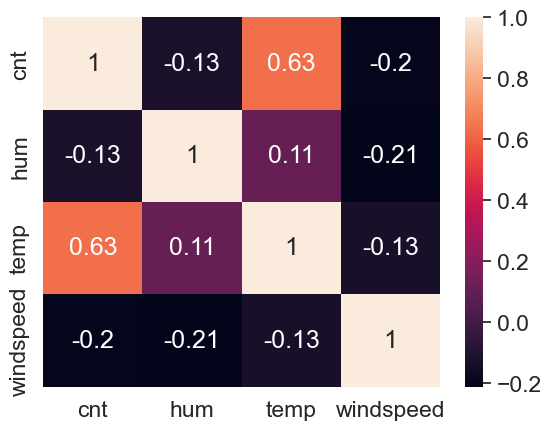

In [29]:
columns_to_visualize = numerical_columns.union(pd.Index(['cnt']))
sns.heatmap(df_bikes[columns_to_visualize].corr(),annot=True)

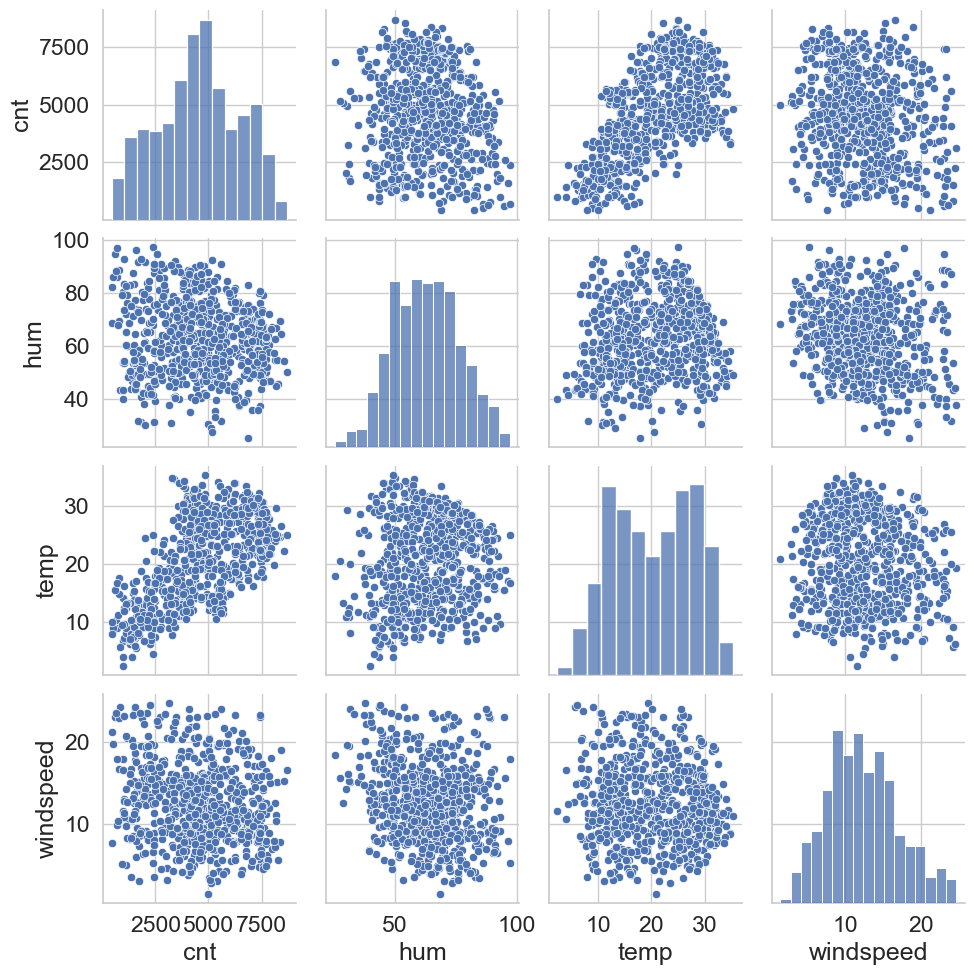

In [63]:
#Plotting pair plot on numerical variables 
sns.pairplot(data=df_bikes[columns_to_visualize])

#### **Observations**
- **Categorical Features like yr , holiday , workingday are already binary encoded** and hence no further data preparation is needed.
- **Categorical Features like season, weekday, mnth, weathersit we can convert them into categorical variables values using the data dictionary**

In [31]:
# Replacing numbers with labels from the data dictionary reference
mappings = {
    'weathersit': {1: 'Clear', 2: 'Mist', 3: 'Light Snow', 4: 'Heavy Rain'},
    'season': {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'},
    'mnth': {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'June', 7: 'July', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'},
    'weekday': {0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'}
}

for column, mapping in mappings.items():
    df_bikes[column] = df_bikes[column].map(mapping)

df_bikes.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


### **EDA on the dataset**

## **Univariate Analysis**

In [32]:
def plot_box_for_categories(df, numerical_column, categorical_columns_list):
    # Set the overall aesthetics
    sns.set_style("whitegrid")
    
    # Determine the number of plots
    num_plots = len(categorical_columns_list)
    
    # Create a figure to hold the plots
    fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(8, 5 * num_plots))
    
    # Adjust space between plots
    plt.subplots_adjust(hspace=0.4)
    
    # If there is only one plot, ensure axes is iterable
    if num_plots == 1:
        axes = [axes]
    
    # Generate each plot
    for ax, cat_col in zip(axes, categorical_columns_list):
        sns.boxplot(x=cat_col, y=numerical_column, data=df, ax=ax)
        ax.set_title(f'Box Plot of {numerical_column} by {cat_col}')
        ax.set_xlabel(cat_col)
        ax.set_ylabel(numerical_column)

    # Show the plot
    plt.tight_layout()
    plt.show()

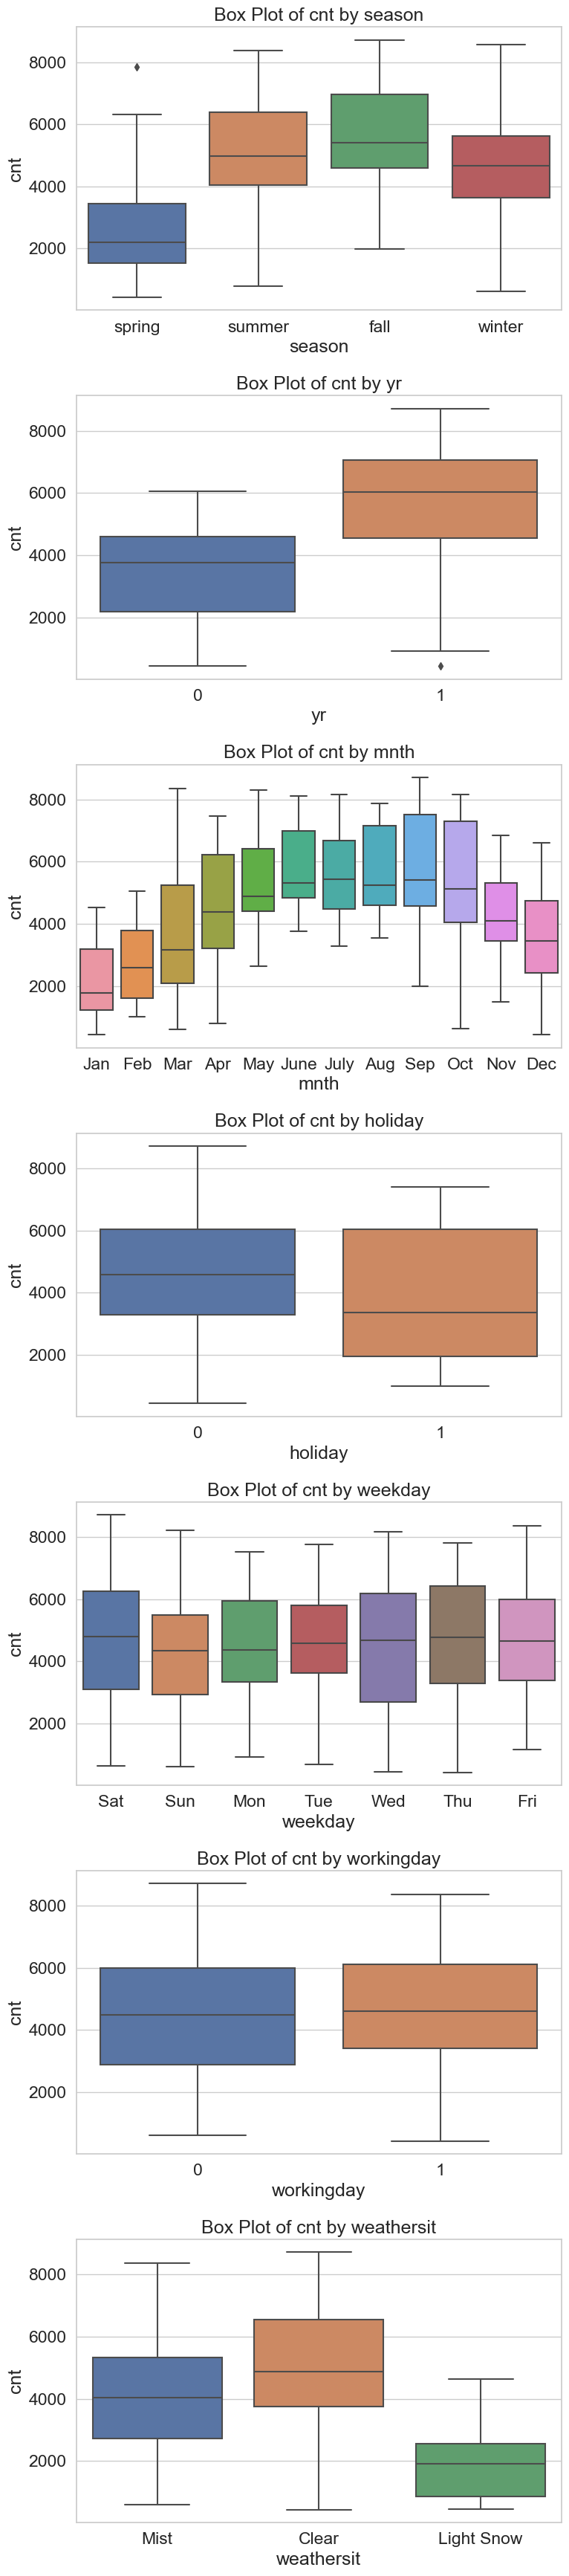

In [33]:
df_bikes.head()
plot_box_for_categories(df_bikes,'cnt',categorical_columns.tolist())


#### Outlier Removal for spring since outliers remain for categorical columns

In [34]:
df_bikes = df_bikes[~((df_bikes['season'] == 'spring') & (df_bikes['cnt'] > 6000))]

##### **Observations**
- **For the Season plot** : **Fall** has the **hightest rental followed by Summer**, Spring having the least
- **For the yearly plot** : There is year on year **increase number of rentals from 2018 to 2019 by median increase of around 2000**
- **For the monthly plot** : The **months from May to Sept show increase in rentals with median above 4000**, which suggests month might be a good predictor
- **For the holiday plot** : The registration is more for non holiday days but the number of holidays are very less hence this might create some bias in prediction.
- **For the weekday plot** : The **median registrations for all the weekdays is similar** so this variable might have low or no influence in the cnt variable.
- **For the weather plot** : **Clear, Few clouds, Partly cloudy, Partly cloudy weather have more registrations for bike.**

In [35]:
df_bikes.shape

(705, 11)

## **Data Preparation**

### **Creating Indicator Variables**

In [36]:

def convert_to_dummies_for_specific_columns(df):

    # Identify categorical columns with more than 2 unique values
    categorical_cols = [col for col in df.columns if df[col].dtype == 'object' and df[col].nunique() > 2]

    # Convert identified columns to dummy variables and concatenate with the original DataFrame
    for col in categorical_cols:
        # Creating dummies
        dummies = pd.get_dummies(df[col], prefix=col,drop_first=True,dtype=int)
        # Drop the original column from DataFrame
        df = df.drop(col, axis=1)
        # Concatenate the dummy variables
        df = pd.concat([df, dummies], axis=1)

    return df


In [37]:
df_bikes_modified = convert_to_dummies_for_specific_columns(df_bikes)

In [38]:
df_bikes_modified.shape

(705, 29)

In [39]:
df_bikes_modified.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_July', 'mnth_June',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'weathersit_Light Snow',
       'weathersit_Mist'],
      dtype='object')

### **Splitting the data into Train and Test dataset**

#### We will split the dataset into **70:30 ratio** using the train_test_split methon in sklearn

In [40]:
df_bikes_train,df_bikes_test=train_test_split(df_bikes_modified,train_size=0.7,random_state=100)

In [41]:
print(df_bikes_train.shape)
print(df_bikes_test.shape)

(493, 29)
(212, 29)


### **Rescaling the feature variables**
From the data, we can see temp, hum and windspeed have larger and decimal values compared to others. We can normalized the numbers using the MinMax method and have all the numbers within 0 and 1 range. MinMax also takes care of outliers

In [42]:
numerical_scaler = MinMaxScaler()
numerical_scaler.fit(df_bikes_train[numerical_columns])
df_bikes_train[numerical_columns] = numerical_scaler.fit_transform(df_bikes_train[numerical_columns])
df_bikes_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist
222,0,0,0,0.780902,0.651315,0.519083,4150,0,0,0,...,0,0,0,1,0,0,0,0,0,1
445,1,0,1,0.329209,0.020335,0.444628,5102,0,1,0,...,0,0,0,0,0,0,1,0,0,0
686,1,0,1,0.385282,0.420455,0.324421,3910,0,0,1,...,0,0,0,0,0,0,0,0,0,0
448,1,0,1,0.387359,0.437799,0.293875,5459,0,1,0,...,0,0,0,0,0,0,0,0,0,1
640,1,1,0,0.403972,0.622607,0.452260,5478,0,0,1,...,1,0,1,0,0,0,0,0,0,1


In [43]:
# Creating our feature and target variable datasets in y_train and X_train
y_train = df_bikes_train.pop('cnt')
X_train = df_bikes_train
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist
222,0,0,0,0.780902,0.651315,0.519083,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
445,1,0,1,0.329209,0.020335,0.444628,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
686,1,0,1,0.385282,0.420455,0.324421,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
448,1,0,1,0.387359,0.437799,0.293875,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
640,1,1,0,0.403972,0.622607,0.452260,0,0,1,0,...,1,0,1,0,0,0,0,0,0,1


## **Building a Linear Regression Model**
- Follow **Hybrid Approach ( RFE + Manual Elimination)** 
- **Use Recurssive Feature Elimination** and then p-value and VIF to further eliminate the features 

In [44]:

lm =  LinearRegression()
rfe= RFE(lm,n_features_to_select=15,step=1)
selector = rfe.fit(X_train,y_train)

In [45]:
rfe_ranking = pd.DataFrame({'rank' : selector.ranking_, 'support': selector.support_, 'features' : X_train.columns}).sort_values(by='rank',ascending=True)
rfe_ranking

,rank,support,features
0,1,True,yr
19,1,True,mnth_Sep
17,1,True,mnth_Nov
15,1,True,mnth_Mar
26,1,True,weathersit_Light Snow
12,1,True,mnth_Jan
11,1,True,mnth_Feb
10,1,True,mnth_Dec
27,1,True,weathersit_Mist
6,1,True,season_spring


In [46]:
X_train_selected = X_train.loc[:, selector.support_]

In [47]:
X_train_selected.head()

,yr,holiday,temp,hum,windspeed,season_spring,season_winter,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Mar,mnth_Nov,mnth_Sep,weathersit_Light Snow,weathersit_Mist
222,0,0,0.780902,0.651315,0.519083,0,0,0,0,0,0,0,0,0,1
445,1,0,0.329209,0.020335,0.444628,0,0,0,0,0,1,0,0,0,0
686,1,0,0.385282,0.420455,0.324421,0,1,0,0,0,0,1,0,0,0
448,1,0,0.387359,0.437799,0.293875,0,0,0,0,0,1,0,0,0,1
640,1,1,0.403972,0.622607,0.452260,0,1,0,0,0,0,0,0,0,1


In [48]:
# Function for Ordinary Least Squares (OLS) Regression Fit
def ols_fit(y, X):
    
    # Add a constant term to the independent variables
    X_train_sm = sm.add_constant(X)
    
    # Fit an OLS regression model
    model = sm.OLS(y, X_train_sm).fit()
    
    # Print the summary statistics of the regression
    print(model.summary())
    
    return model

# Function for Variance Inflation Factor (VIF) Calculation
def vif(X):
    
    # Add a constant term to the independent variables
    df = X
    
    # Calculate the VIF for each independent variable
    vif = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    
    # Create a DataFrame to display VIF values
    vif_frame = pd.DataFrame({'vif': vif[0:]}, index=df.columns).reset_index()
    
    # Print the DataFrame, sorted by VIF values in descending order
    print(vif_frame.sort_values(by='vif', ascending=False))

#### Building the model using RFE selected variables.
Assumption any feature with p value greate than 0.050 and vif > 5 need to eliminated 

#### **Model 1**
Using the RFE selected features 

In [49]:
features_rfe = X_train_selected.columns
ols_fit(y_train,X_train[features_rfe])
vif(X_train[features_rfe])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     181.2
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          5.85e-186
Time:                        22:27:46   Log-Likelihood:                -3962.8
No. Observations:                 493   AIC:                             7958.
Df Residuals:                     477   BIC:                             8025.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3172.87

#### **Model 2**
Using the RFE selected features  removing humidity as it has high vif and low pvalue

In [50]:
features_rfe = features_rfe.drop('hum')
ols_fit(y_train,X_train[features_rfe])
vif(X_train[features_rfe])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     188.1
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          3.92e-184
Time:                        22:27:46   Log-Likelihood:                -3969.9
No. Observations:                 493   AIC:                             7970.
Df Residuals:                     478   BIC:                             8033.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2839.23

#### **Model 3**
Using the RFE selected features  removing season_spring as it has high vif and low pvalue

In [51]:
features_rfe = features_rfe.drop('season_spring')
ols_fit(y_train,X_train[features_rfe])
vif(X_train[features_rfe])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     197.3
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          8.09e-183
Time:                        22:27:46   Log-Likelihood:                -3975.8
No. Observations:                 493   AIC:                             7980.
Df Residuals:                     479   BIC:                             8038.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2737.97

#### **At this stage, we have an adjusted R-square values 0.843 which means our model explains 84.3% of the variance in the train data.**

In [52]:
final_model = ols_fit(y_train,X_train[features_rfe])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     197.3
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          8.09e-183
Time:                        22:27:46   Log-Likelihood:                -3975.8
No. Observations:                 493   AIC:                             7980.
Df Residuals:                     479   BIC:                             8038.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2737.97

#### **Final Model Summary**

In [53]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     197.3
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          8.09e-183
Time:                        22:27:46   Log-Likelihood:                -3975.8
No. Observations:                 493   AIC:                             7980.
Df Residuals:                     479   BIC:                             8038.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2737.9791    239.926     11.412      0.000    2266.542    3209.416
yr                     2017.8291     71.234     28.327      0.000    1877.860    2157.799
holiday                -591.2343    194.550     -3.039      0.003    -973.511    -208.958
temp                   2907.5925    290.292     10.016      0.000    2337.189    3477.996
windspeed              -601.5800    171.655     -3.505      0.001    -938.871    -264.289
season_winter           770.1328    118.244      6.513      0.000     537.792    1002.473
mnth_Dec              -1058.5320    167.787     -6.309      0.000   -1388.222    -728.842
mnth_Feb              -1259.8091    185.573     -6.789      0.000   -1624.447    -895.171
mnth_Jan              -1620.7885    194.254     -8.344      0.000   -2002.483   -1239.094
mnth_Mar               -761.8989    168.714     -4.516      0.000   -1093.411    -430.387
mnth_Nov               -878.7787    165.686     -5.304      0.000   -1204.340    -553.218
mnth_Sep                409.3333    127.889      3.201      0.001     158.040     660.626
weathersit_Light Snow -2193.7786    211.257    -10.384      0.000   -2608.884   -1778.673
weathersit_Mist        -692.9248     75.866     -9.134      0.000    -841.996    -543.854
==============================================================================
Omnibus:                       93.512   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              247.300
Skew:                          -0.933   Prob(JB):                     1.99e-54
Kurtosis:                       5.925   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### **Residual Analysis**

#### **Residuals must be normally distributed**
- **As we can see from the distribution below, our residuals are normally distributed.**

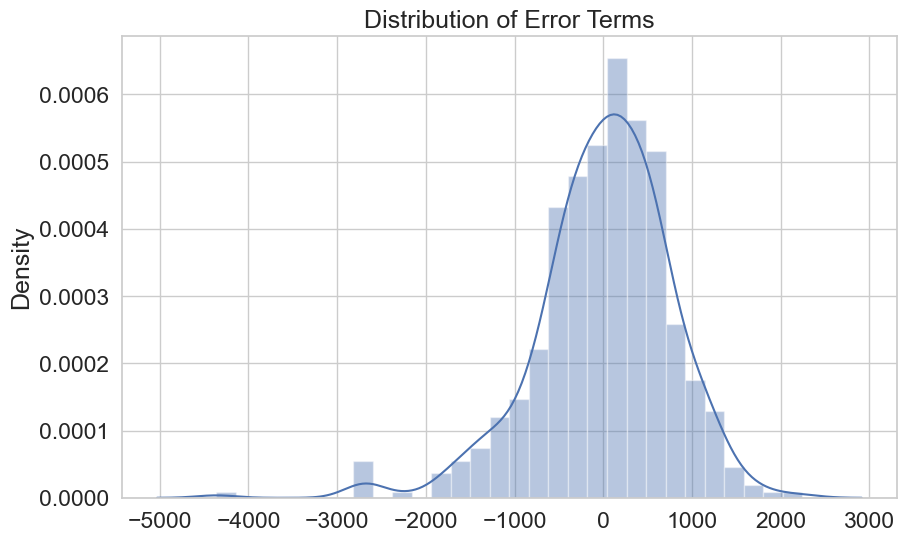

In [54]:
# Residual Analysis of Trained Data
X_train_sm = sm.add_constant(X_train[features_rfe])

y_train_pred = final_model.predict(X_train_sm)
fig, ax = plt.subplots(figsize=(10, 6))

# Frequency Distribution of Residuals
ax.set(title='Distribution of Error Terms')
sns.distplot(y_train - y_train_pred, bins=30, ax=ax)

plt.show()

  ###  Residual errors follow a normal distribution with mean=0
        Variance of Errors doesnt follow any trends
        Residual errors are independent of each other since the Predicted values vs Residuals plot doesn't show any trend.

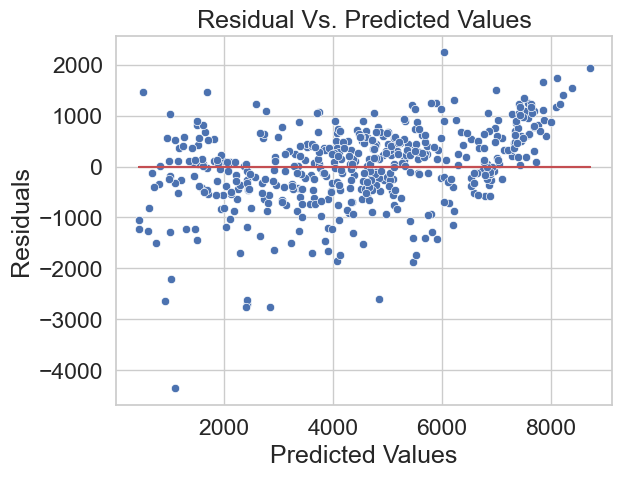

In [55]:
sns.scatterplot(x=y_train, y=y_train - y_train_pred)
plt.plot(y_train, [0] * len(y_train), '-r')
plt.title('Residual Vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [56]:
df_bikes_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist
128,0,0,1,22.242500,63.2917,8.083014,4182,0,1,0,...,0,0,0,0,0,0,0,1,0,0
596,1,0,0,27.128347,71.2917,16.375336,6053,0,0,0,...,0,0,0,1,0,0,0,0,0,1
483,1,0,1,25.727500,73.5417,10.916846,6296,0,1,0,...,0,0,0,0,0,0,0,0,0,0
378,1,0,1,15.294763,71.6087,23.391710,2935,1,0,0,...,0,0,0,0,0,0,1,0,0,1
400,1,0,1,10.523347,72.2917,8.959307,2802,1,0,0,...,0,0,0,0,0,0,0,1,0,1


### **Hence, assumptions of Linear Regression are satisfied by this model**

### **Making Predictions**

#### Applying the scaling on the test sets

In [57]:
y_test = df_bikes_test.pop('cnt')
X_test = df_bikes_test
X_test[numerical_columns] = numerical_scaler.transform(X_test[numerical_columns])
X_test = X_test[features_rfe]
X_test = sm.add_constant(X_test)
y_test_pred = final_model.predict(X_test)

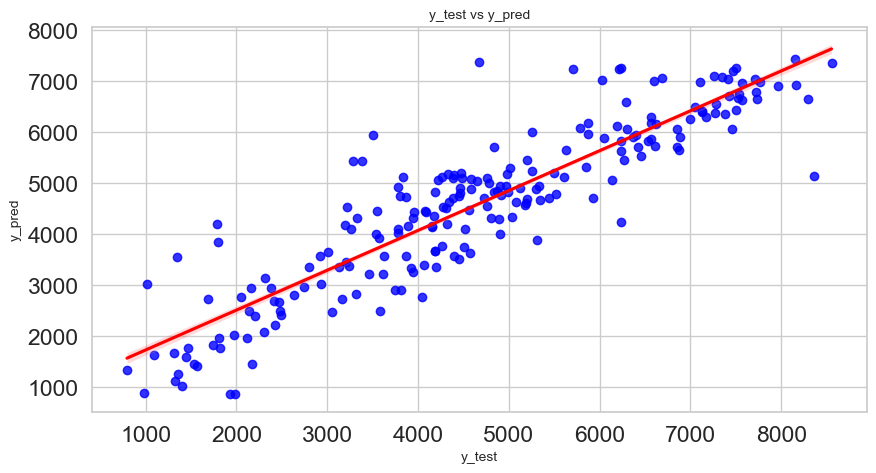

In [58]:
#Linear Regression plot to check the fit on test data 
plt.figure(figsize=(10,5))
sns.regplot(x=y_test, y=y_test_pred, ci=60, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_pred', fontsize=10)              
plt.xlabel('y_test', fontsize=10)                         
plt.ylabel('y_pred', fontsize=10)                          
plt.show()

#### **Observation**
- **Predicted vs observed value plots shows that the model is reasonably accurate.**

In [59]:
mse = mean_squared_error(y_test, y_test_pred)
rsquared_test = r2_score(y_test, y_test_pred)
rsquared_train = r2_score(y_train, y_train_pred)
print('R-squared for train data:',round(rsquared_train,2))
print('R-squared for test data:',round(rsquared_test,2))


R-squared for train data: 0.84
R-squared for test data: 0.81


In [60]:
# Show all cofficients
cofficients = round(final_model.params,2)
beta = cofficients.sort_values(ascending = False)
beta

temp                     2907.59
const                    2737.98
yr                       2017.83
season_winter             770.13
mnth_Sep                  409.33
holiday                  -591.23
windspeed                -601.58
weathersit_Mist          -692.92
mnth_Mar                 -761.90
mnth_Nov                 -878.78
mnth_Dec                -1058.53
mnth_Feb                -1259.81
mnth_Jan                -1620.79
weathersit_Light Snow   -2193.78
dtype: float64

In [61]:
# best fit line
for i in range(0, len(beta)):
    print(beta[i],'*',beta.index[i],end ='')
    print(' + ',end ='')

2907.59 * temp + 2737.98 * const + 2017.83 * yr + 770.13 * season_winter + 409.33 * mnth_Sep + -591.23 * holiday + -601.58 * windspeed + -692.92 * weathersit_Mist + -761.9 * mnth_Mar + -878.78 * mnth_Nov + -1058.53 * mnth_Dec + -1259.81 * mnth_Feb + -1620.79 * mnth_Jan + -2193.78 * weathersit_Light Snow + 

Summary Report
Model 3 seems to be a good model. We got Adj R-square for training: 0.84 and test: 0.81. This model can generalize and predict demand from new data set
Top predictor variables:
temperature(temp): coefficient of 2907.59, indicates a unit increase in temeprature variable will increase the bike hire number by 2907.59.
year: coefficient of 2017.83, indicates a unit increase in year will increase the bike hire number by 2017.83.
weathersit_Light Snow: coefficient of -2193.78, indicates if the weather situation gets bad by one level then bike hire number goes down by -2193.78.
windspeed: coefficient of -601.58, indicates if the wind speed increases one unit, the bike hire goes down by -601.58.
Season(season_winter): coefficient of 770.13, indicates in winter season the bike hire goes up by 770.13
